In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = df["Survived"]
df.drop(columns="PassengerId",inplace=True)

# Intenciones 

En este EDA mi intencio es explorar las caracteristicas de las personas que sobreviven y la de las que no sobreviven 

**Preguntas Interesantes**

1. Ser Mujer mejoraba tus posibilidades de Supervivencia?
2. Que rango etario es el que mas sobrevivia
3. Tener un Status elevado en la sociedad mejoraba tus posibilidades de supervivencia?
4. Gastar mas dinero en Tickets mejoraba tus chances de sobrevivir?
5. Pertenecer a primera clase aumenta tus posibilidades de sobrevivir?
6. Tener hijos hace que tus posibilidades de supervivencia mejoren?
7. Existia camaraderia entre personas que embarcaban en el mismo puerto que mejorara sus chances de sobrevivir?

# Indice 
1. [Missing Values](#handeling-missing-values)
2. [Duplicated Values](#handeling-duplicates)
3. [Analisis de Tipo de Datos](#analisis-de-tipo-de-datos)
4. [Data Distribucion](#exploring-data-distributions)
5. [Numerical](#numerical-data)
6. [Categorical](#categorical-data)
7. [survivor's composition](#exploring-composition)
8. [Sex](#sex-survivement)
9. [Passanger Class](#pclass-survivement)
10. [Siblings and Children](#sibsp-survivement)
11. [Embarkation](#embarked-survivement)
12. [Fare](#fare-survivement)
13. [Category](#age-category-survivement)
14. [Name Titles](#exploring-name-titles)
15. [Summary](#summary)
16. [Relationships](#exploring-data-relationships)
17. [Categorical Survivemt](#exploring-the-relationships-between-categorical-data-and-survivement)
18. [Chi2](#chi-cuadrado)
19. [Anova](#anova)

# Handeling Missing Values

lo que se realizara es la eliminacion de cualquier columa con 30% o mas de datos faltantes y la imputacion de cualquier columna con menos del 30% se hara mediante la media o median foward fill  

In [5]:
(df.isna().sum()/len(df))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [6]:
df.drop(columns="Cabin",inplace=True)

In [7]:
df["Embarked"].ffill(inplace=True)

In [8]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [9]:
(df.isna().sum()/len(df))*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

Se imputo la edad con la media de la edad, se realizo foward fill para el lugar de embarcacion y se elimino la columna cambiana por tener mas del 77% de casos faltantes

# Handeling Duplicates

In [10]:
test = df.duplicated()
df[test]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


No se encontraron datos Duplicados

# Exploración de Distribuciones y Composiciones

## Separando variables categoricas de numericas y texto

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [12]:
df_numeric = df.select_dtypes(["int64","float64"])
df_objet = df.select_dtypes("object")
df_categorical = df.select_dtypes("object")

In [13]:
df_numeric.drop(columns="Survived", inplace=True)

In [14]:
#im moving Pclass, SibSp and Parch to a categorical df to have it separated
df_categorical["SibSp"] = df_numeric["SibSp"] 
df_categorical["Parch"] = df_numeric["Parch"] 
df_categorical["Pclass"] = df_numeric["Pclass"] 

df_categorical.drop(columns=["Name","Ticket"],inplace=True)
df_numeric.drop(columns=["SibSp","Parch","Pclass"],inplace=True)


In [15]:
df_numeric.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [16]:
df_objet.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [17]:
df_categorical.head()

,Sex,Embarked,SibSp,Parch,Pclass
0,male,S,1,0,3
1,female,C,1,0,1
2,female,S,0,0,3
3,female,S,1,0,1
4,male,S,0,0,3


Se creo 3 datasets diferentes los cuales contienen los datos numericos, las variables categoricas (numericas y no numericas) y las variables no numericas para realizar analisis de las mismas 

# Handeling Outliers

## Numerical Data

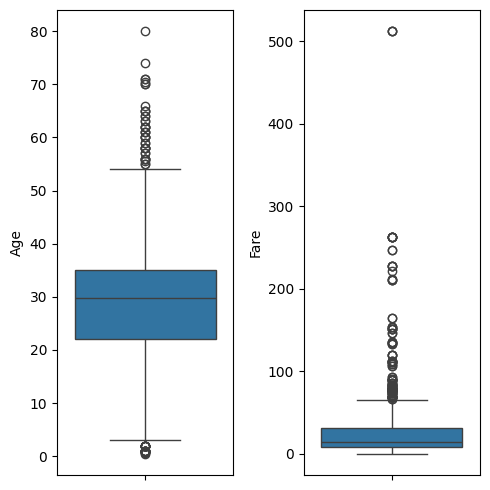

In [18]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(5, 5))

sns.boxplot(data=df_numeric["Age"],ax=ax[0])
sns.boxplot(data=df_numeric["Fare"],ax=ax[1])

plt.tight_layout()
plt.show()


In [19]:
# Age
first_quantile = df["Age"].quantile(0.25) 

third_quantile = df["Age"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr


df = df.loc[(df["Age"] >= lower_bound)&(df["Age"] <= upper_bound),:]

first_quantile = df["Fare"].quantile(0.25) 

third_quantile = df["Fare"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr


df = df.loc[(df["Fare"] >= lower_bound)&(df["Fare"] <= upper_bound),:]

## Categorical Data

### Visualizacion de Outliers

A continuacion se realiza una tabla de frecuencias para cada variable categorica de manera de poder detectar valores atipicos

In [20]:
print(
    df_categorical["Sex"].value_counts(),"\n\n",
    df_categorical["Embarked"].value_counts(),"\n\n",
    df_categorical["SibSp"].value_counts(),"\n\n"
)

Sex
male      577
female    314
Name: count, dtype: int64 

 Embarked
S    644
C    169
Q     78
Name: count, dtype: int64 

 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 




In [21]:
print(
    df_categorical["Parch"].value_counts(),"\n\n",
    df_categorical["Pclass"].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


A continuacion se realiza una visualizacion usando graficos de caja  y de dispersion 

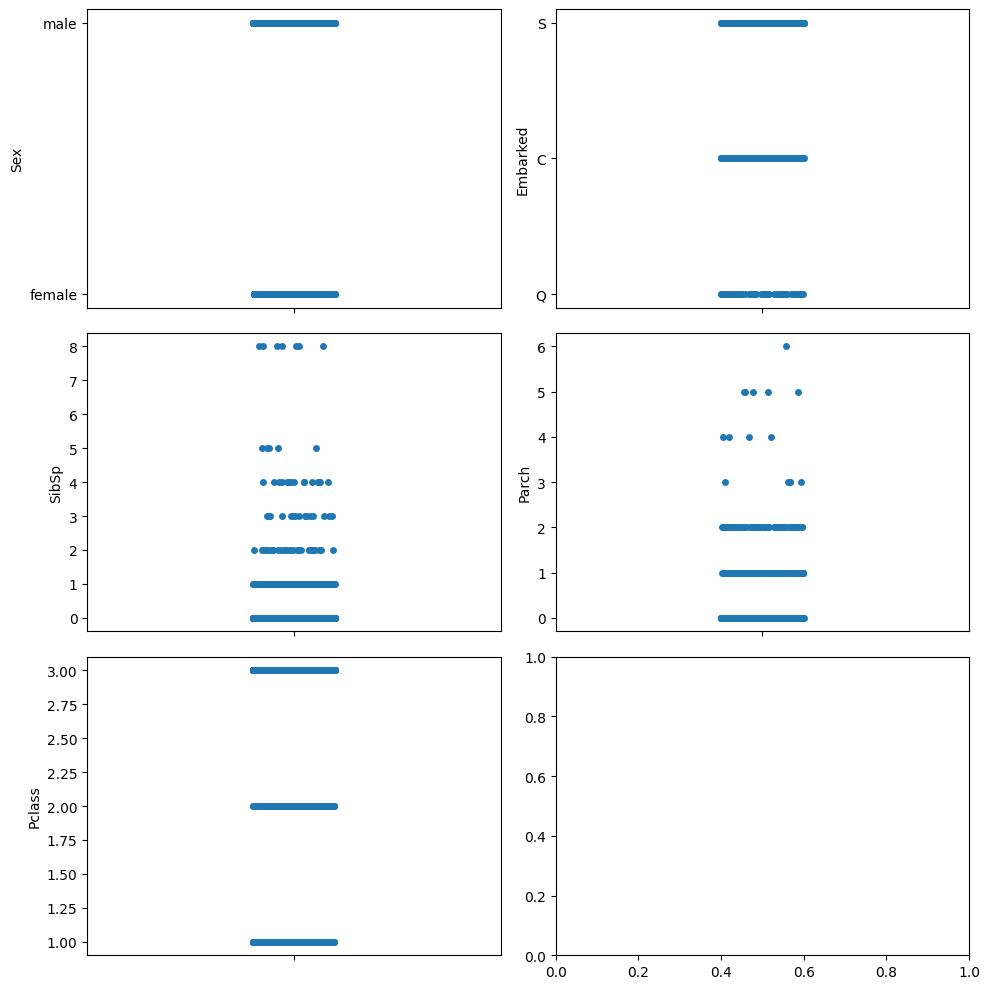

In [22]:
fig,ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

#Sex	Embarked	SibSp	Parch	Pclass

sns.stripplot(data=df_categorical["Sex"], ax=ax[0,0])
sns.stripplot(data=df_categorical["Embarked"], ax=ax[0,1])
sns.stripplot(data=df_categorical["SibSp"], ax=ax[1,0])
sns.stripplot(data=df_categorical["Parch"], ax=ax[1,1])
sns.stripplot(data=df_categorical["Pclass"], ax=ax[2,0])

plt.tight_layout()
plt.show()

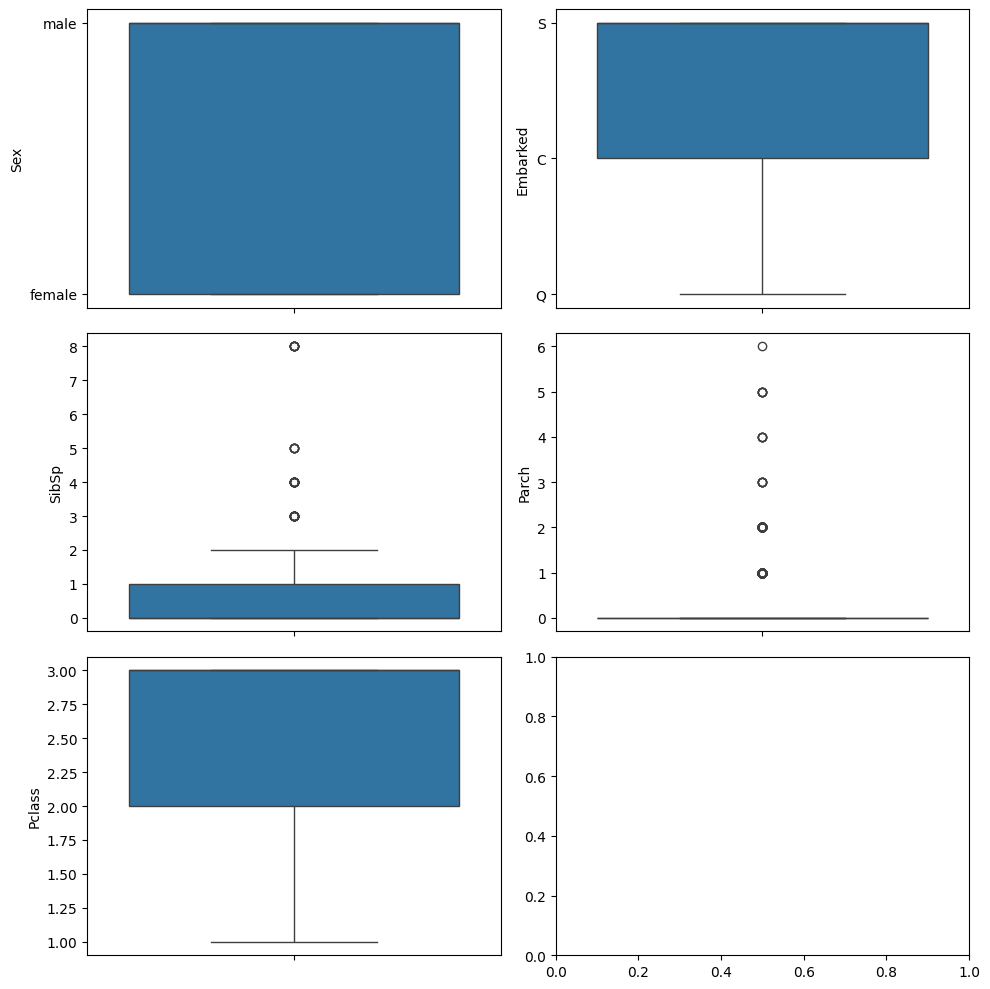

In [23]:
fig,ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

#Sex	Embarked	SibSp	Parch	Pclass

sns.boxplot(data=df_categorical["Sex"], ax=ax[0,0])
sns.boxplot(data=df_categorical["Embarked"], ax=ax[0,1])
sns.boxplot(data=df_categorical["SibSp"], ax=ax[1,0])
sns.boxplot(data=df_categorical["Parch"], ax=ax[1,1])
sns.boxplot(data=df_categorical["Pclass"], ax=ax[2,0])

plt.tight_layout()
plt.show()

### Pruebas Formales de Outliers

Para corroborar utilizare el zscore usando las frecuencias para detectar que categoria tien frecuencias poco comunies que pueden ser consideradas outliers

In [24]:
Sex = df_categorical["Sex"].value_counts()
Embarked = df_categorical["Embarked"].value_counts()
SibSb = df_categorical["SibSp"].value_counts()
Parch = df_categorical["Parch"].value_counts()
Pclass = df_categorical["Pclass"].value_counts()

In [25]:
def categoric_z_score(categorie):
    mean = sum(categorie)/len(categorie)
    suma = 0    
    zvalues = {}
    for item in categorie:
        suma += (item-mean)**2
    
    sd = np.sqrt(suma/len(categorie))

    for key ,value in categorie.items():
        zvalues[key] = (value - mean)/sd
    return zvalues

In [26]:
def catch_categorical_outlier(dict):
    for key, value in dict.items():
        if abs(value) > 3:
            print(f"OUTLIER : {key} : {value} \n\n")

In [27]:
# SEX z-score
Sex_Zscore = categoric_z_score(Sex)
#Embarked
Embarked_Zscore = categoric_z_score(Embarked)
#SibSb
SibSb_Zscore = categoric_z_score(SibSb)
#Parch
Parch_Zscore = categoric_z_score(Parch)
#Pclass
Pclass_Zscore = categoric_z_score(Pclass)

print("Sex zscore: ",catch_categorical_outlier(Sex_Zscore),"\n\n","Embarked z-score: ",catch_categorical_outlier(Embarked_Zscore),"\n\n","SibSb z-score: ",catch_categorical_outlier(SibSb_Zscore),"\n\n","Parch z-score: ",catch_categorical_outlier(Parch_Zscore),"\n\n",catch_categorical_outlier(Pclass_Zscore))

Sex zscore:  None 

 Embarked z-score:  None 

 SibSb z-score:  None 

 Parch z-score:  None 

 None


In [28]:
Sex

Sex
male      577
female    314
Name: count, dtype: int64

In [29]:
#IQR para frecuencias 
# Age
first_quantile = df["Age"].quantile(0.25) 

third_quantile = df["Age"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr

## Exploring Data Distributions

### Numerical Data

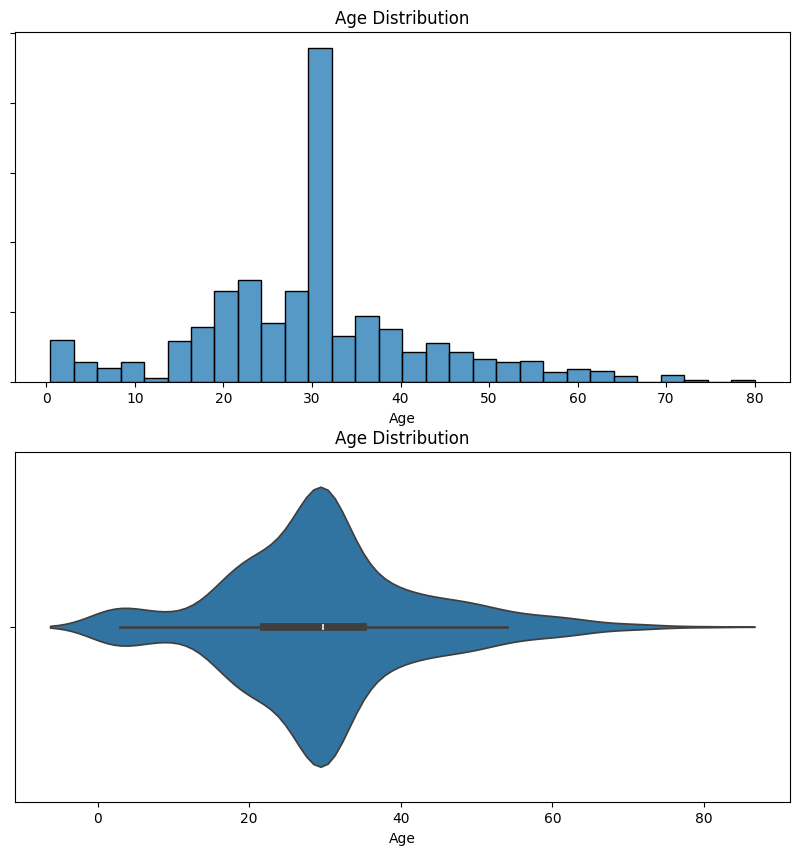

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.violinplot(x=df_numeric["Age"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Age Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

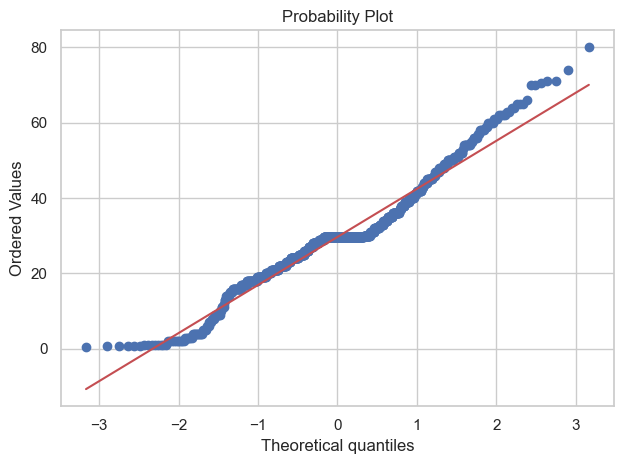

In [31]:
import scipy.stats as stats
sns.set(style="whitegrid")
stats.probplot(df_numeric["Age"].dropna(), dist="norm", plot=plt)
# Ajuste para el layout
plt.tight_layout()
plt.show()

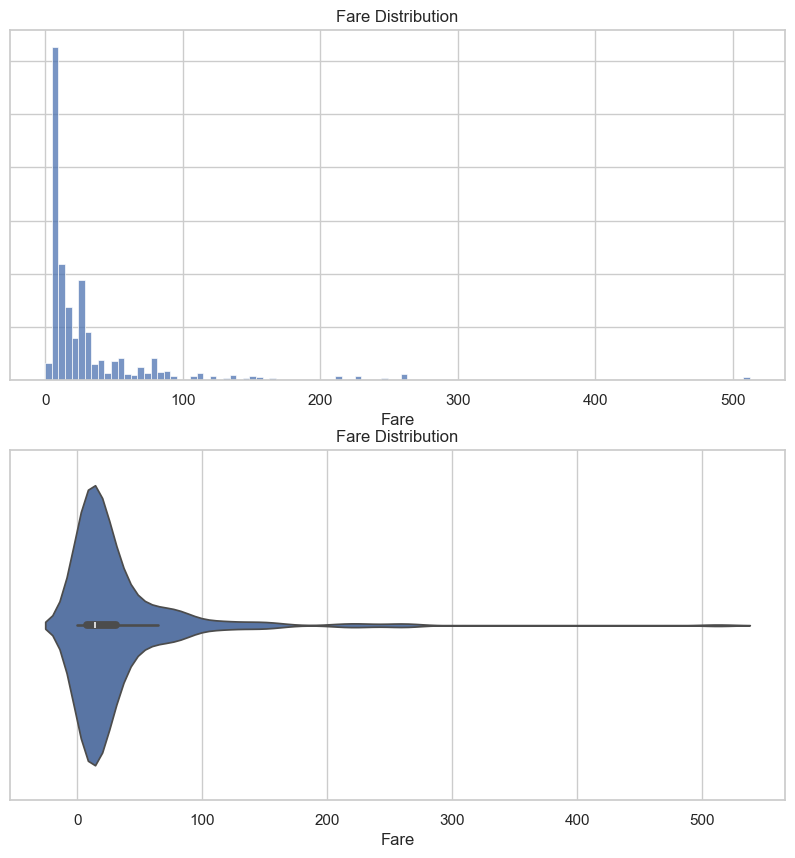

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Fare"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Fare Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.violinplot(x=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

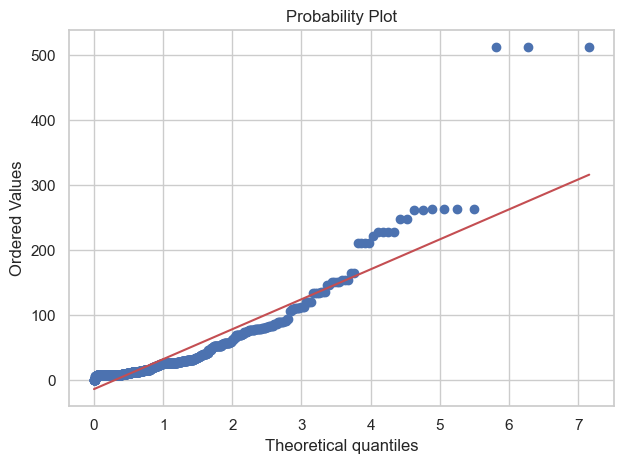

In [33]:
import scipy.stats as stats
sns.set(style="whitegrid")
stats.probplot(df_numeric["Fare"].dropna(), dist="expon", plot=plt)
# Ajuste para el layout
plt.tight_layout()
plt.show()

**Summary** : veo que en la Distribucion de los datos numericos encuntro que las edades siguen uan distribucion que parece ser ciertamente normal pero de todas maneras encuentro una acumulacion de valores bajos lo que indica una buena parte de la poblacion eran muy jovenes. 

Ademas con respecto a Fare la cantidad de dinero gastado veo que es una distribucion exponenecial con cola hacia la derecha lo que quiere decir que los valores se acumulan a la izquierda pero existen outliers de gran valor, esto me dice 2 cosas :

1. Que era bastante mas habitual gastar poco dinero.
2. Habia un reducido numero de personas que podian permitirse gastar una gran cantidad de dinero 

### Categorical Data

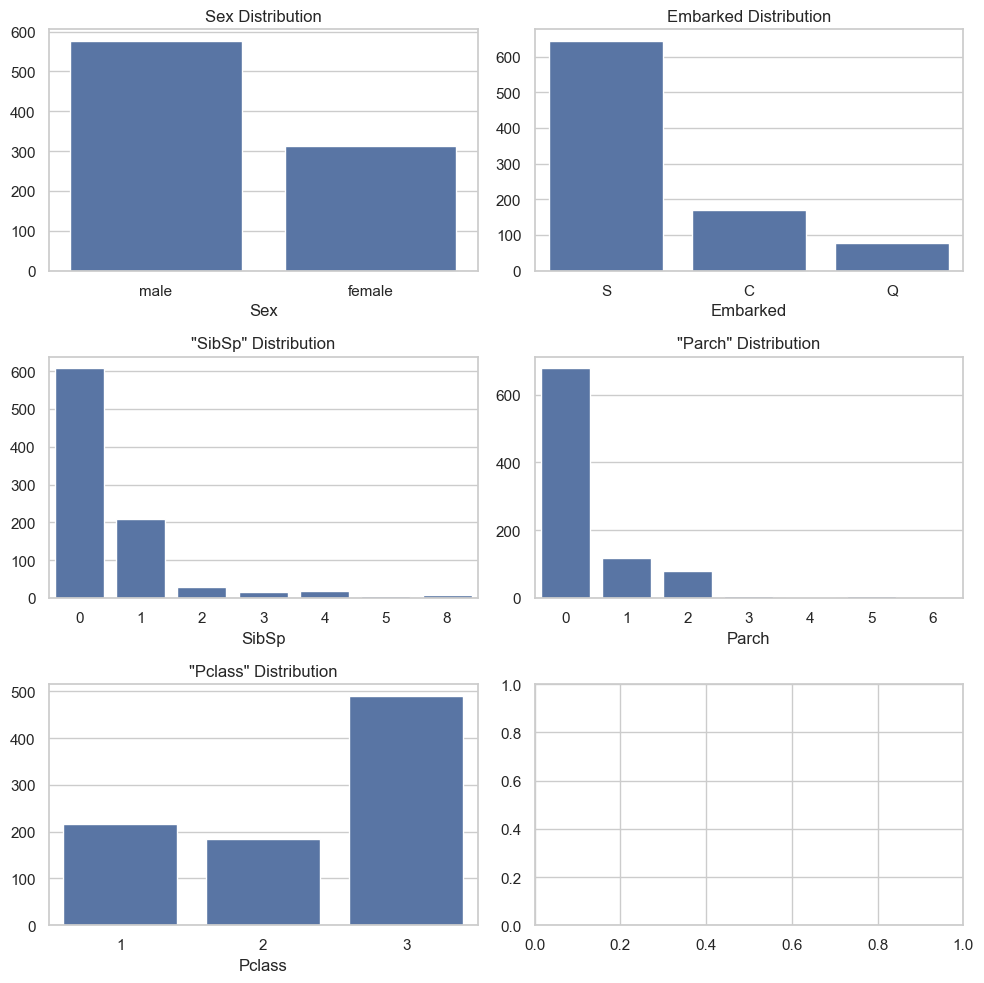

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

g1 = sns.countplot(x=df_categorical["Sex"],ax=ax[0,0]) #creates graph


g1.set(title='Sex Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.countplot(x=df_categorical["Embarked"],ax=ax[0,1]) #creates graph


g2.set(title='Embarked Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot(x=df_categorical["SibSp"],ax=ax[1,0]) #creates graph

g3.set(title='"SibSp" Distribution')  # add a title
g3.set(ylabel=None)  # remove the axis label


g4 = sns.countplot(x=df_categorical["Parch"],ax=ax[1,1]) #creates graph

g4.set(title='"Parch" Distribution')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot(x=df_categorical["Pclass"],ax=ax[2,0]) #creates graph

g5.set(title='"Pclass" Distribution')  # add a title
g5.set(ylabel=None)  # remove the axis label

fig.tight_layout()
plt.show()

## Exploring Composition

### Analyzing Absolutes

In [35]:
bins = [-np.inf,1,3,5,12,18,25,64,np.inf]
labels = ["baby","Toddler","Preschool","GrandSchooler","Teen","Young Adult","Adult","Senior"]

df["Age_Category"] = pd.cut(df["Age"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adult


In [36]:
bins = [-np.inf,8,15,31,np.inf]
labels = ["bajo","medio","medio-alto","alto"]

df["Fare_Category"] = pd.cut(df["Fare"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category,Fare_Category
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young Adult,bajo
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult,bajo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult,alto
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult,medio
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adult,medio


In [37]:
# Regular expression pattern to match common name titles
pattern = r"Mr\.|Master\.|Mrs\.|Miss\.\s+"

df["Title_Name"] = df.loc[~df["Name"].str.contains(pattern, regex=True),"Title_Name"] = 1
df["Title_Name"].fillna(0, inplace=True)

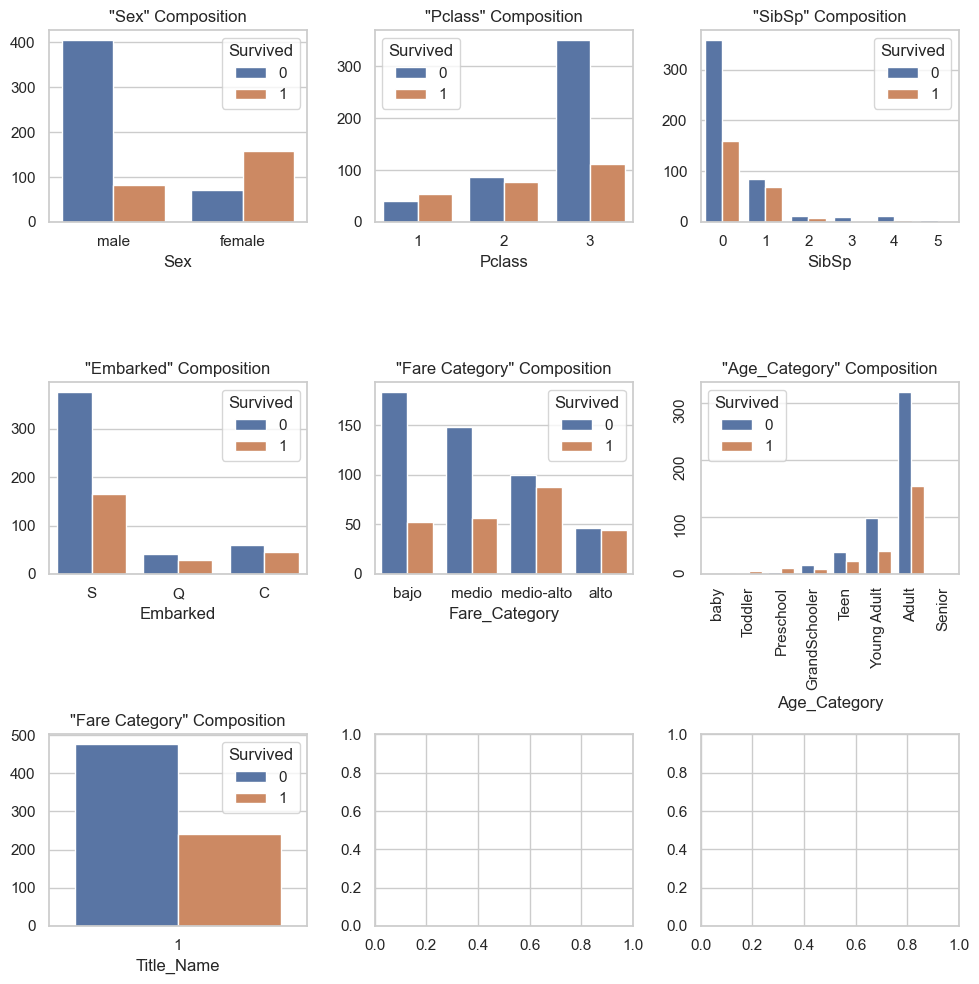

In [38]:
#Sex and Survivement
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

g1 = sns.countplot( data=df, x="Sex", hue="Survived",ax=ax[0,0])
g1.set(title='"Sex" Composition')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.countplot( data=df, x="Pclass", hue="Survived",ax=ax[0,1])
g2.set(title='"Pclass" Composition')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot( data=df, x="SibSp", hue="Survived",ax=ax[0,2])
g3.set(title='"SibSp" Composition')  # add a title
g3.set(ylabel=None)  # remove the axis label

g4 = sns.countplot( data=df, x="Embarked", hue="Survived",ax=ax[1,0])
g4.set(title='"Embarked" Composition')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot( data=df, x="Fare_Category", hue="Survived",ax=ax[1,1])
g5.set(title='"Fare Category" Composition')  # add a title
g5.set(ylabel=None)  # remove the axis label

g6 = sns.countplot( data=df, x="Age_Category", hue="Survived",ax=ax[1,2])
g6.set(title='"Age_Category" Composition')  # add a title
g6.set(ylabel=None)  # remove the axis label
ax[1,2].tick_params(labelrotation=90)  # remove the axis label

g7 = sns.countplot(data=df,x="Title_Name",hue="Survived", ax=ax[2,0])
g7.set(title='"Fare Category" Composition')  # add a title
g7.set(ylabel=None)  # remove the axis label
plt.tight_layout()
plt.show()

### Analizing Percentiles

In [39]:
df.loc[:,["Title_Name","Survived"]].groupby("Title_Name").mean()*100

,Survived
Title_Name,
1,33.426184


## Summary

En terminos de sobrevivencia podemos observar que :
1. En relacion con el **Sexo** Sobrevivieron mas **Mujeres** que hombres
2. En relacion con la **Clase** del pasaje sobrevivieron mas pasajeros de **1ra** clase que de 3ra y 2da (3ra sobrevivio mas gente que 2ra)
3. En relacion con **SibSp** (hijos o hermanos) con la sobreviviencia se observa que sobrevivieron en el siguiente orden de cantidad 01234
4. En leracion con **Embarked** sobrevivieron en el siguiente orden S C Q
5. En relacion con preico del ticket **Fare** la composicion de supervivencia es alto medioalto meido bajo (mas gasta mas sobrevive)
6. En realcion con la edad **Age** la sobrevivencia la indica la siguiente lista (de mayor sobrevivencia a menor sobrevivencia) Adult, Young Adult, Teen, baby, Preschool, GrandSchooler,Toddler, Senior 
7. En relacion con los titulos de nombre **Title_Name** se observa que hay mas gente sin titulos de nombre se sobrevivio pero cuando vemos los porcentajes de sobrevivencia vemos exactamente lo opuesto con lo que podemos pensar que quizas es mas probable sobrevivir si tiene un titulo de nombre a que si no lo tengo

**Nota**: el resumen se basa en terminos totales, pero es de destacar que cuando hablamos en terminos porcentuales algunos resultados cambian favoreciendo poblacion que suponen una minoria con lo que es interesante considerarlo ya que esto podria indicar que de pertenecer a esa categoria haria que las probabilidades de supervivencia aumenten.


# Exploring Data Relationships

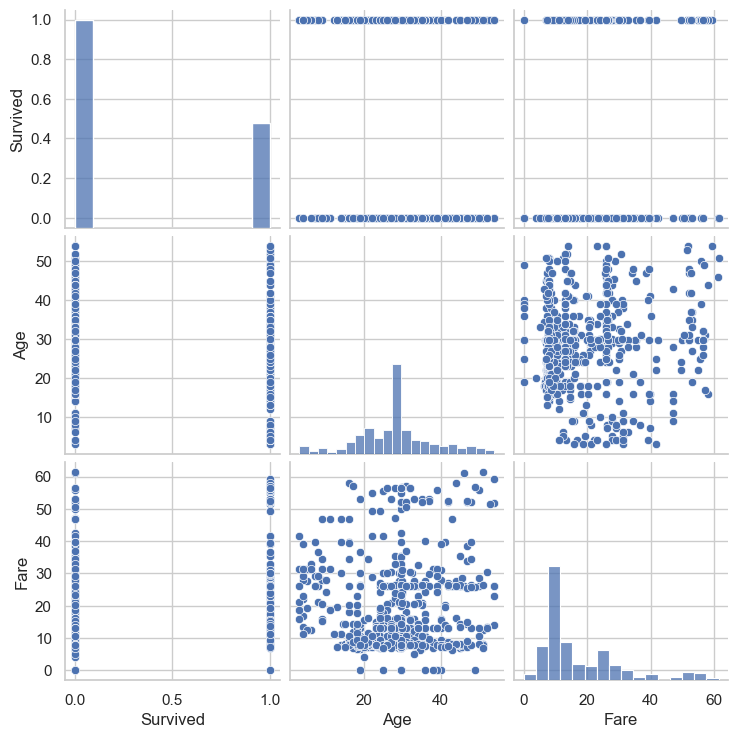

In [40]:
numerical = df.select_dtypes("number")
numerical.drop(columns=["Pclass","SibSp","Parch","Title_Name"],inplace=True)
sns.pairplot(data=numerical)

## Exploring the Relationships between categorical data and Survivement

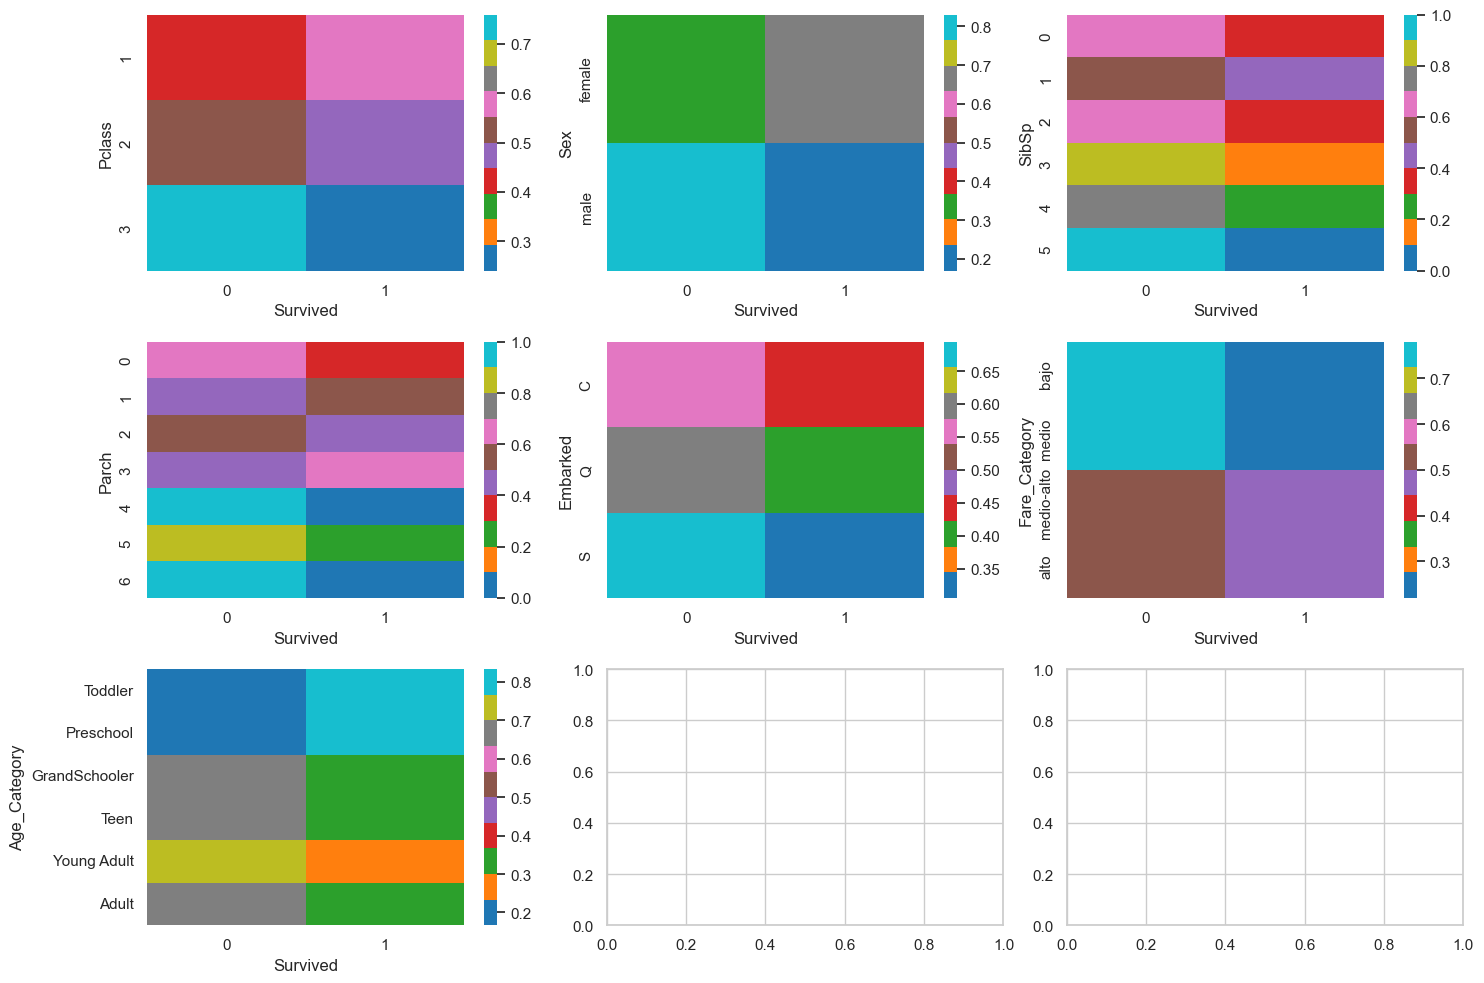

In [72]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
#Survivement y Sex


sns.color_palette("hls", 8)

sns.heatmap(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,0])

sns.heatmap(pd.crosstab(df['Sex'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,1])

sns.heatmap(pd.crosstab(df['SibSp'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,2])

sns.heatmap(pd.crosstab(df['Parch'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,0])

sns.heatmap(pd.crosstab(df['Embarked'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,1])

sns.heatmap(pd.crosstab(df['Fare_Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,2])

sns.heatmap(pd.crosstab(df['Age_Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[2,0])

plt.tight_layout()
plt.show()

### 

In [42]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Pclass'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")

Chi-cuadrado: 53.850012340692814
Valor p: 2.0259018219238356e-12
Grados de libertad: 2
Frecuencia esperada:
 [[ 62.57938719  31.42061281]
 [107.84958217  54.15041783]
 [307.57103064 154.42896936]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [43]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Pclass'] == 1]  # Pasajeros de clase 1
grupo2 = df['Survived'][df['Pclass'] == 2]  # Pasajeros de clase 2
grupo3 = df['Survived'][df['Pclass'] == 3]  # Pasajeros de clase 3

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 28.986493667862835
Valor p: 7.864417651478237e-13
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


### Chi Cuadrado

In [45]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Sex'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 184.19195957801395
Valor p: 5.891179292142233e-42
Grados de libertad: 1
Frecuencia esperada:
 [[152.454039  76.545961]
 [325.545961 163.454039]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### Chi Cuadrado

In [47]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['SibSp'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 14.616189918816401
Valor p: 0.012134577443808902
Grados de libertad: 5
Frecuencia esperada:
 [[345.51810585 173.48189415]
 [101.19220056  50.80779944]
 [ 11.98328691   6.01671309]
 [  7.32311978   3.67688022]
 [  9.32033426   4.67966574]
 [  2.66295265   1.33704735]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [48]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['SibSp'] == 1]  
grupo2 = df['Survived'][df['SibSp'] == 2]  
grupo3 = df['Survived'][df['SibSp'] == 0]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 5.209178066517746
Valor p: 0.0056844671783843935
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


In [50]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Parch'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 20.54306738305635
Valor p: 0.0022154941588839756
Grados de libertad: 6
Frecuencia esperada:
 [[3.85462396e+02 1.93537604e+02]
 [5.32590529e+01 2.67409471e+01]
 [2.99582173e+01 1.50417827e+01]
 [3.32869081e+00 1.67130919e+00]
 [1.99721448e+00 1.00278552e+00]
 [3.32869081e+00 1.67130919e+00]
 [6.65738162e-01 3.34261838e-01]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [51]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Parch'] == 1]  
grupo2 = df['Survived'][df['Parch'] == 2]  
grupo3 = df['Survived'][df['Parch'] == 3]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 0.38081305922630365
Valor p: 0.6840832040335841
No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.


In [53]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Embarked'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 8.273373869875025
Valor p: 0.015975692431908092
Grados de libertad: 2
Frecuencia esperada:
 [[ 69.2367688   34.7632312 ]
 [ 47.26740947  23.73259053]
 [361.49582173 181.50417827]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [54]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Embarked'] == "S"]  
grupo2 = df['Survived'][df['Embarked'] == "Q"]  
grupo3 = df['Survived'][df['Embarked'] == "C"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 4.167423131083201
Valor p: 0.01587007255317603
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


In [56]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Fare_Category'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 41.836603291864975
Valor p: 4.345573496503043e-09
Grados de libertad: 3
Frecuencia esperada:
 [[157.11420613  78.88579387]
 [135.81058496  68.18941504]
 [125.15877437  62.84122563]
 [ 59.91643454  30.08356546]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [57]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Fare_Category'] == "alto"]  
grupo2 = df['Survived'][df['Fare_Category'] == "medio-alto"]  
grupo3 = df['Survived'][df['Fare_Category'] == "medio"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: 10.343339103301952
Valor p: 4.001651516972226e-05
Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.


In [59]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Age_Category'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 19.56109311739483
Valor p: 0.001510250604964905
Grados de libertad: 5
Frecuencia esperada:
 [[  3.99442897   2.00557103]
 [  8.6545961    4.3454039 ]
 [ 15.97771588   8.02228412]
 [ 39.94428969  20.05571031]
 [ 92.53760446  46.46239554]
 [316.8913649  159.1086351 ]]
Se rechaza la hipótesis nula: hay asociación entre las variables.


### ANOVA

In [60]:
import numpy as np
from scipy import stats

# Agrupar los datos por 'Pclass'
grupo1 = df['Survived'][df['Age_Category'] == "baby"]  
grupo2 = df['Survived'][df['Age_Category'] == "toddler"]  
grupo3 = df['Survived'][df['Age_Category'] == "preschool"]  

# Realizar ANOVA de un solo factor
f_stat, p_value = stats.f_oneway(grupo1, grupo2, grupo3)

# Resultados
print("Estadístico F:", f_stat)
print("Valor p:", p_value)

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay diferencias significativas entre las medias.")
else:
    print("No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.")


Estadístico F: nan
Valor p: nan
No se rechaza la hipótesis nula: no hay diferencias significativas entre las medias.


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


<Axes: xlabel='Survived', ylabel='Title_Name'>

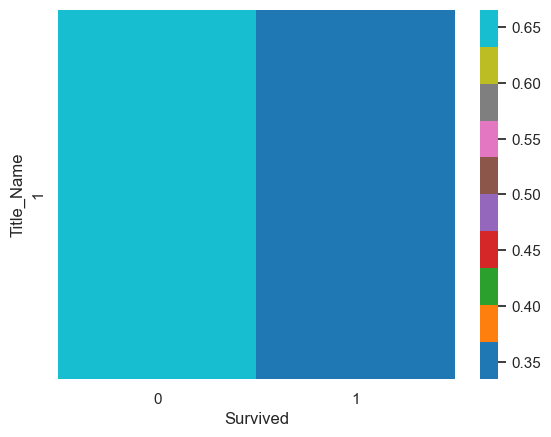

In [61]:
# Survivement y Title_Name
# Heatmap 
sns.color_palette("hls", 8)
sns.heatmap(pd.crosstab(df['Title_Name'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"))

In [62]:
# Prueba de Chi cuadrado
# Realizar la prueba de Chi-cuadrado
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
tabla_contingencia = pd.crosstab(df['Title_Name'], df['Survived'])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia )

# Resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencia esperada:\n", expected)

# Interpretación del resultado
alpha = 0.05
if p < alpha:
    print("Se rechaza la hipótesis nula: hay asociación entre las variables.")
else:
    print("No se rechaza la hipótesis nula: no hay asociación entre las variables.")


Chi-cuadrado: 0.0
Valor p: 1.0
Grados de libertad: 0
Frecuencia esperada:
 [[478. 240.]]
No se rechaza la hipótesis nula: no hay asociación entre las variables.


## Interaction Analysis 

# Data bias analysis

# Exploracion multivariante

In [63]:
from sklearn import ensemble                
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold, train_test_split